In [10]:
from analyzer import GaiaAnalyzer
from downloader import LightCurveExtractor

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                    
                     'font.family': 'Serif',
                     'figure.figsize': (10, 6)
                    })

In [12]:
gaia_analyzer = GaiaAnalyzer(file_names=["clustercat.dat", "escapecat.dat"])
gaia_analyzer.get_data()

/Users/jeremyng/Desktop/Yale/7 - FALL 2025/ASTR 365 - Astrostatistics/binary/analyzer/gaia_analyzer.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_data = pd.read_csv(file_name, delim_whitespace=True, names=header, comment="#", skiprows=1)
/Users/jeremyng/Desktop/Yale/7 - FALL 2025/ASTR 365 - Astrostatistics/binary/analyzer/gaia_analyzer.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_data = pd.read_csv(file_name, delim_whitespace=True, names=header, comment="#", skiprows=1)


,PlxErr,G,Gerr,Dec,BpRpErr,mua,muaErr,RA,Plx,Gaia_EDR3_Source_ID,mudErr,mud,BpRp
0,0.31,3.8633,0.0027,24.3675,0.0000,19.52,0.45,56.4568,7.67,65283232316451328,0.28,-45.53,-0.0138
1,0.13,5.2033,0.0009,24.1365,0.0000,19.50,0.15,57.2968,7.24,66529975427235712,0.10,-47.65,-0.0331
2,0.10,5.4283,0.0008,23.4210,0.0000,19.70,0.11,57.0868,7.69,64940906245415808,0.08,-47.11,-0.0671
3,0.07,5.4413,0.0009,24.2893,0.0000,19.85,0.08,56.2010,7.39,65287458566524928,0.06,-44.97,-0.0212
4,0.06,5.6404,0.0006,24.8391,0.0000,20.22,0.07,56.2907,7.22,69812945346809600,0.04,-46.12,-0.0805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,0.46,20.0513,0.0040,-30.1123,0.2993,23.63,0.41,73.6592,15.19,4876633583026501888,0.49,-37.25,3.3819
1557,0.44,20.0745,0.0044,-38.8154,0.2061,3.00,0.46,91.3667,11.69,2883006349448527872,0.53,-15.06,3.0406
1558,1.12,20.1549,0.0063,25.7851,0.1392,22.63,1.12,49.6722,7.50,117448530704135680,0.81,-42.53,2.7306
1559,0.54,20.2695,0.0054,-46.1629,0.2173,-4.28,0.69,101.2028,10.38,5552812377749046272,0.68,-5.36,2.5872


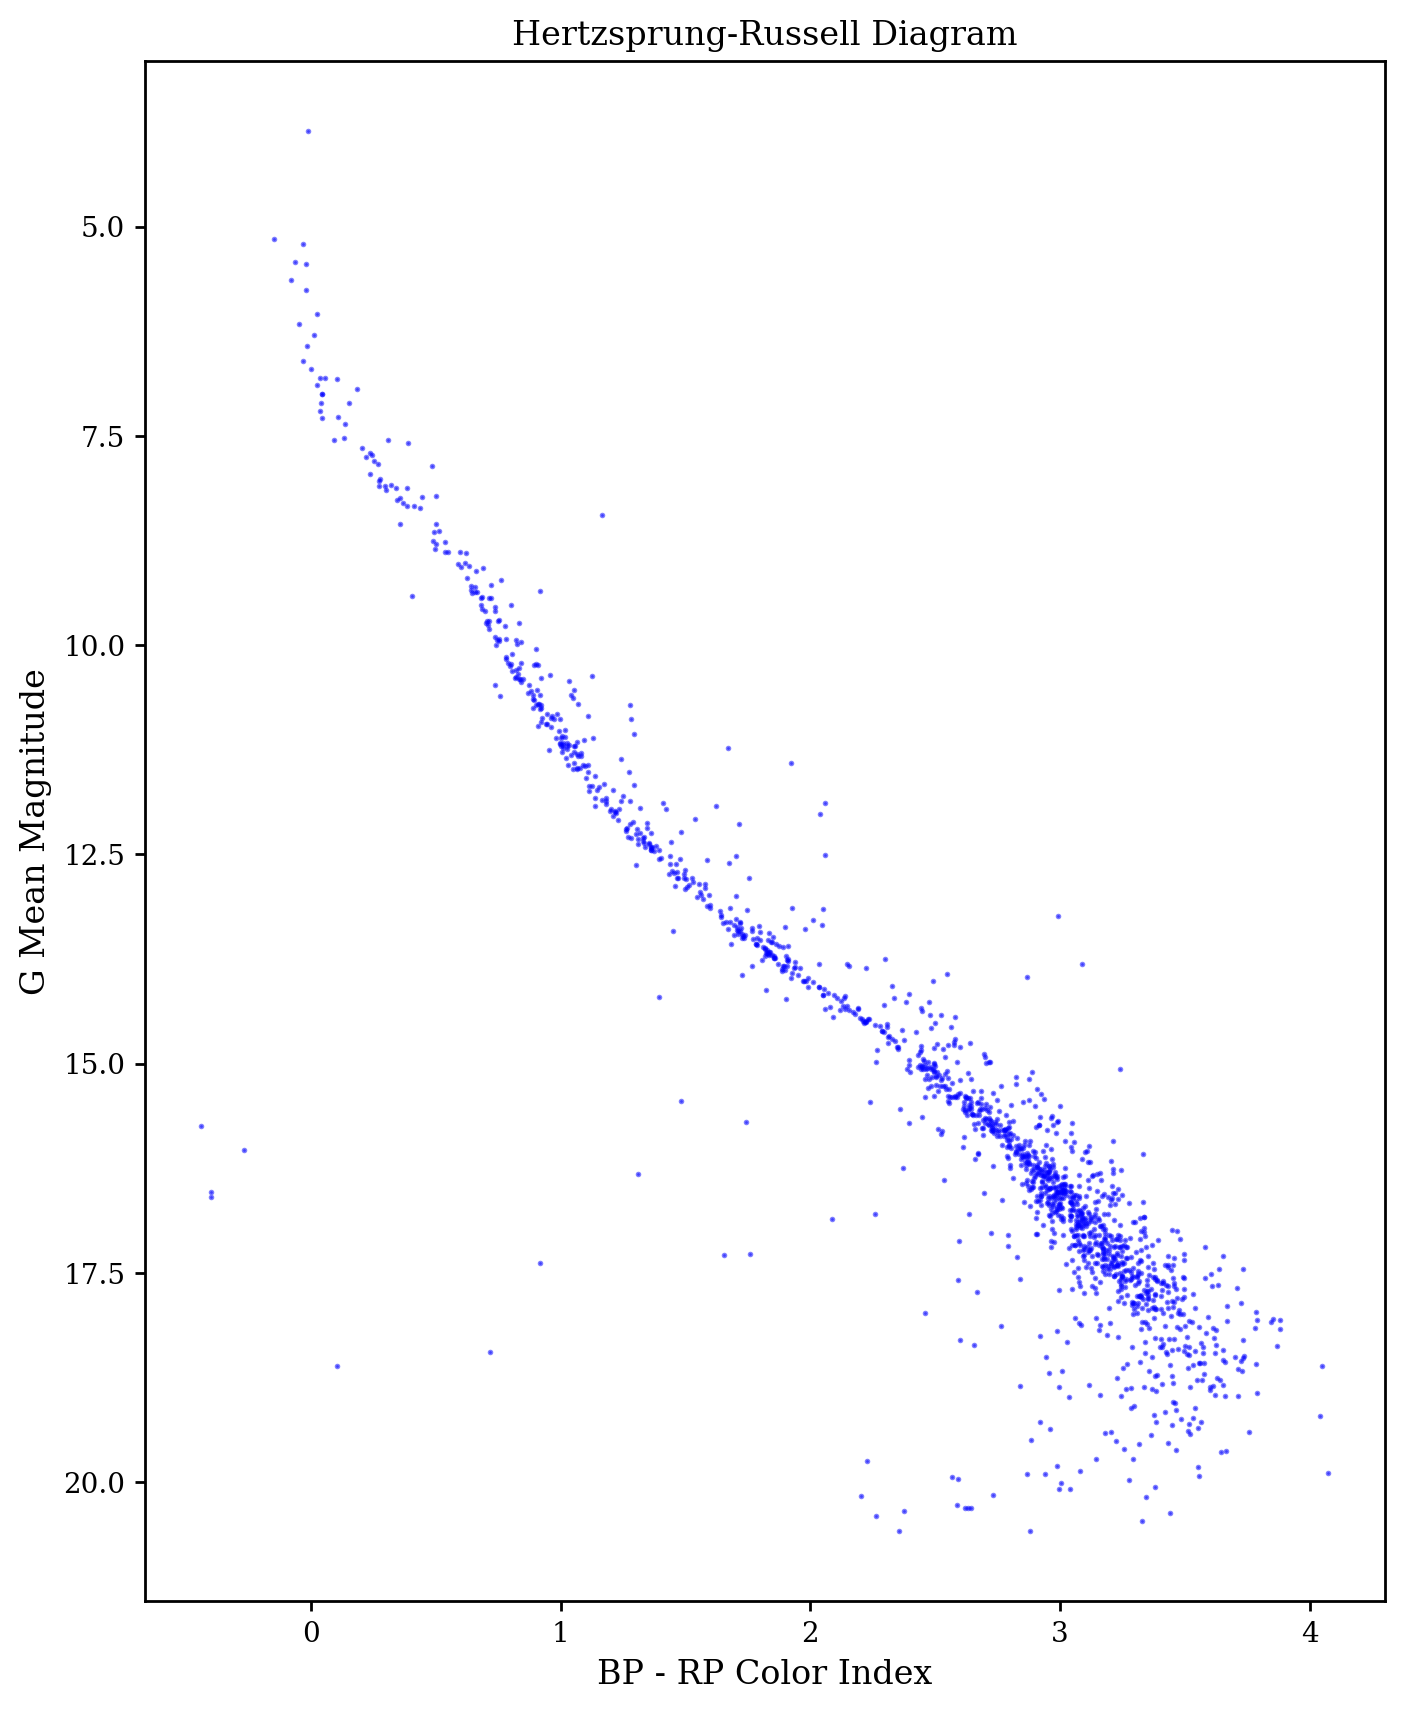

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'Hertzsprung-Russell Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [13]:
gaia_analyzer.plot_hr_diagram(show=True)